In [1]:
# Setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 14,
          'figure.figsize':(10.0, 6.0),
          'lines.linewidth': 2.,
          'lines.markersize': 8,}
matplotlib.rcParams.update(params)


# Ordinary differential equations (ODE)

## Scope

* Widely used in physics
* Closed form solutions only in particular cases
* Need for numerical solvers

## Introductive example

Point mass $P$ in free fall. 

Required data:

* gravity field $\vec g = (0, -g)$,
* Mass $m$,
* Initial position $P_0 = (0, 0)$
* Initial velocity $\vec V_0 = (v_{x0}, v_{y0})$

Problem formulation:
$$
\left\lbrace \begin{align*}
\ddot x & = 0\\
\ddot y & = -g
\end{align*}\right.
$$



## Closed form solution


$$
\left\lbrace \begin{align*}
x(t) &= v_{x0} t\\
y(t) &= -g \frac{t^2}{2} + v_{y0}t 
\end{align*}\right.
$$

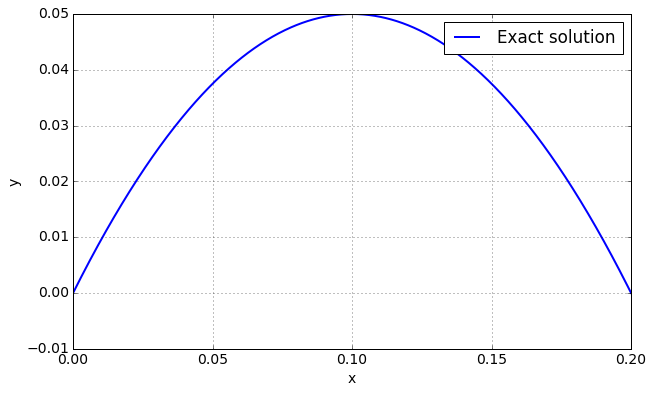

In [2]:
tmax = .2
t  = np.linspace(0., tmax, 1000) 
x0, y0   = 0., 0. 
vx0, vy0 = 1., 1.
g = 10.
x = vx0 * t
y = -g  * t**2/2. + vy0 * t
plt.plot(x, y, label = "Exact solution")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Reformulation

Any ODEs can be reformulated as a first order system equations. Let's assume that
$$
Y = \begin{bmatrix}
x \\
y \\
\dot x \\
\dot y \\
\end{bmatrix}
$$ 

As a consequence:

$$
\dot Y = \begin{bmatrix}
\dot x \\
\dot y \\
\ddot x \\
\ddot y \\
\end{bmatrix}
$$ 

Then, the initialy second order equation can be reformulated as:

$$
\dot Y = f(Y, t) = 
\begin{bmatrix}
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
\end{bmatrix}
Y + 
\begin{bmatrix}
0 \\
0 \\
0 \\
-g \\
\end{bmatrix}
$$ 

Generic problem

Solving $\dot Y = f(Y, t)$




## Numerical integration

* approximate solution: need for error estimation
* discrete time: $t_0$, $t_1$, $\ldots$
* time step $dt = t_{i+1} - t_i$,


## Euler method
* Intuitive
* Fast
* Slow convergence

$$
Y_{n+1} = Y_n + f(Y) dt
$$

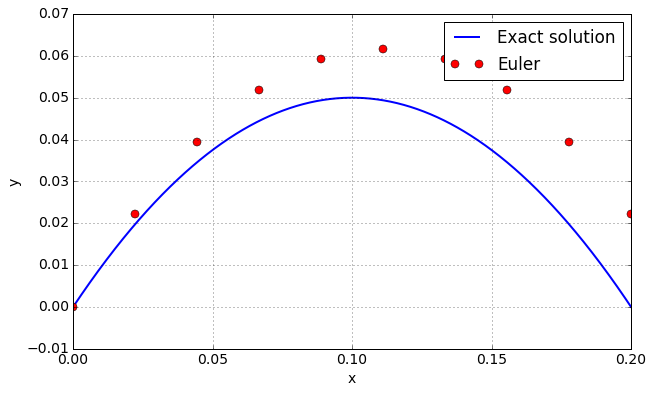

In [3]:
dt = 0.02 # Pas de temps
Y0 = np.array([0., 0., vx0, vy0])
nt = int(tmax/dt) # Nombre de pas
ti = np.linspace(0., nt * dt, nt)

def derivate(Y, t):
  return np.array([Y[2], Y[3], 0., -g])

def Euler(func, y0, t):
  dt = t[1] - t[0]
  nt = len(t)
  Y  = np.zeros([nt, len(y0)])
  Y[0] = y0
  for i in xrange(nt-1):
    Y[i+1] = Y[i] + func(Y[i], t[i]) * dt
  return Y

Y_euler = Euler(derivate, Y0, ti)
x_euler, y_euler = Y_euler[:,0], Y_euler[:,1]
plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Runge Kutta 4



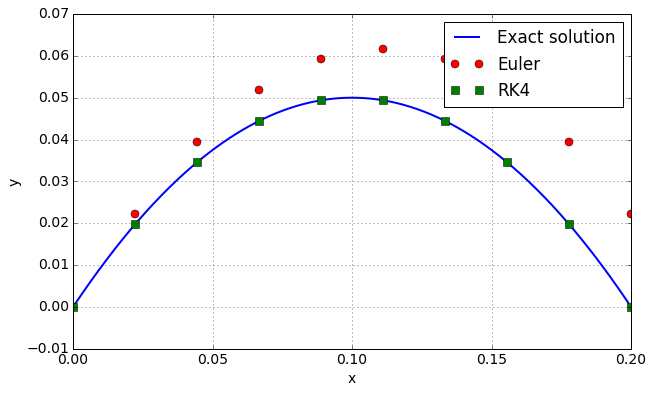

In [4]:
def RK4(func, y0, t):
  dt = t[1] - t[0]
  nt = len(t)
  Y  = np.zeros([nt, len(Y0)])
  Y[0] = y0
  for i in xrange(nt-1):
    k1 = func(Y[i], t[i])
    k2 = func(Y[i] + dt/2. * k1, t[i] + dt/2.)
    k3 = func(Y[i] + dt/2. * k2, t[i] + dt/2.)
    k4 = func(Y[i] + dt    * k3, t[i] + dt)
    Y[i+1] = Y[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
  return Y

Y_rk4 = RK4(derivate, Y0, ti)
x_rk4, y_rk4 = Y_rk4[:,0], Y_rk4[:,1]
plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.plot(x_rk4, y_rk4, "gs", label = "RK4")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Using ODEint 

http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.integrate.odeint.html

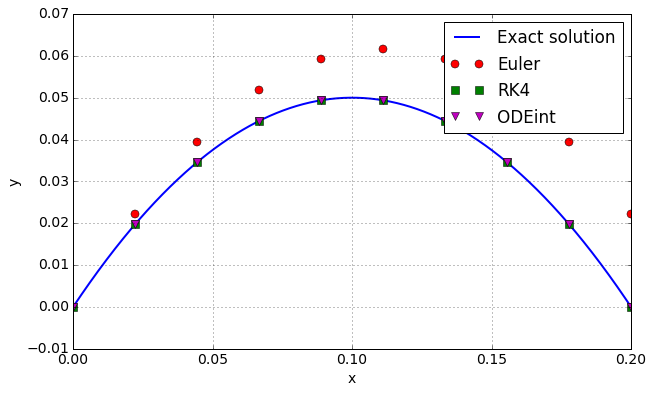

In [5]:
from scipy import integrate

Y_odeint = integrate.odeint(derivate, Y0, ti)
x_odeint, y_odeint = Y_odeint[:,0], Y_rk4[:,1]

plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.plot(x_rk4, y_rk4, "gs", label = "RK4")
plt.plot(x_odeint, y_odeint, "mv", label = "ODEint")

plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Tutorial (TD)

In this example, you have to model and animate a pendulum.

1. Write the constitutive equations.
2. Reformulate the equations as a first order system of ODEs.
3. Solve the problem using Euler, RK4 and ODE integrators.
4. Compare the results.

## Practical Work (TP)

In this example, you will simulate an harmonic oscillator and compare the numerical solution to the closed form one. 

### Theory

Read about the theory of harmonic oscillators on [Wikipedia](https://en.wikipedia.org/wiki/Harmonic_oscillator)

The canonical equation is:

$$
\ddot x + 2 \zeta \omega_0 \dot x + \omega_0^2 x = \ddot x_d
$$

Where:

* $\omega_0$ is the undamped pulsation,
* $\zeta$ is damping ratio,
* $\ddot x_d$ is the imposed acceleration. 

### Undampened oscillator

First, you will focus on the case of an undamped free oscillator ($\zeta = 0$, $\ddot x_d = 0$) with the following initial conditions:

$$
\left \lbrace
\begin{split}
x(t = 0) = 1 \\
\dot x(t = 0) = 0
\end{split}\right.
$$

The closed form solution is:
$$
x(t) = \cos \omega_0 t
$$

Plot this solution for 5 periods.

### Numerical solution
The following code computes the numerical solution using the Euler integrator:


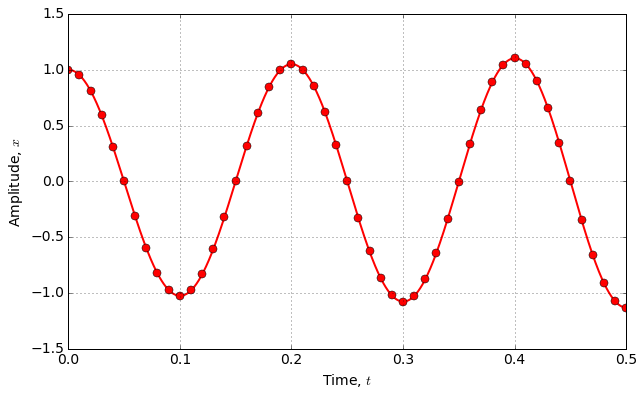

In [6]:
import numpy as np
from scipy.integrate import odeint

class HarmonicOscillator(object):
  """
  An harmonic oscillator class
  
  * X      : initial conditions [x(0), dotx(0)]
  * omega0 : undamped pulsation
  * zeta   : damping ratio
  * ddotxd : imposed acceleration (function)
  """
  def __init__(self, X0 = [1., 0.], omega0 = 1., zeta = 0., ddotxd = lambda t: 0):
    self.X      = np.array([X0,])
    self.omega0 = omega0
    self.zeta   = zeta
    self.ddotxd = ddotxd
    self.t = np.array([0.])
  
  def derivative(self, X, t):
    omega0 = self.omega0
    zeta   = self.zeta
    ddotxd = self.ddotxd
    return np.array([ X[1],
                      ddotxd(t) - 2. * zeta * omega0 * X[1] - omega0**2 * X[0]    
                     ])  

  def solve(self, t, nt, solver = Euler):
    time = np.linspace(0., t, nt + 1)
    Xs = solver( self.derivative, self.X[-1], time)
    self.X = np.append(self.X[:-1], Xs,   axis = 0)
    self.t = np.append(self.t[:-1],  time, axis = 0)
  
  def x(self):
    return self.X[:,0]    
  
  def dotx(self):
    return self.X[:,1] 
  
  def Ep(self):
    """
    Massic potential energy.
    """
    omega0 = self.omega0
    return .5 * omega0**2 * self.x()**2
  
  def Ec(self):
    """
    Massic kinetic energy.
    """
    return .5 * self.dotx()**2
    
    

    
t = .5
nt = 1000
omega0 = 2 * np.pi * 5
o = HarmonicOscillator(omega0 = omega0)
o.solve(t = t, nt = nt, solver = Euler)

fig = plt.figure(0)
plt.clf()
plt.plot(o.t, o.x(), "or-", markevery = 20)
plt.grid()
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $x$")
plt.show()

#### Confrontation
Plot the closed form solution along with the numerical solution. Compare and discuss the results.

#### Energies
The kinetic and potential (massic) energies of the numerical solutions are computed in the following methods:
```python
  def Ep(self):
    """
    Massic potential energy.
    """
    omega0 = self.omega0
    return .5 * omega0**2 * self.x()**2
  
  def Ec(self):
    """
    Massic kinetic energy.
    """
    return .5 * self.dotx()**2
```
Use them to plot the evolution of the energies and compare the result with the closed form solution. An example is five b

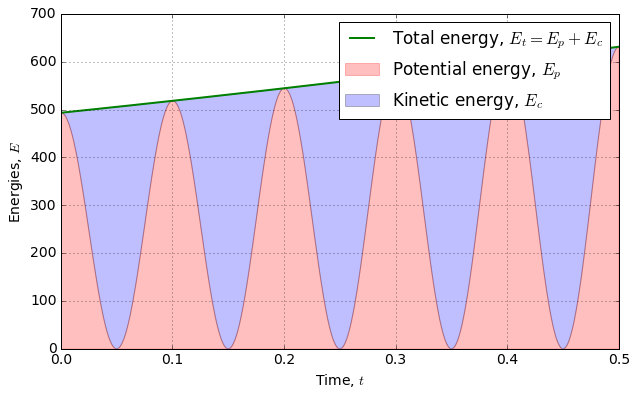

In [7]:
plt.fill_between(o.t, 0., o.Ep(), color = "r", alpha = .25, label = "Potential energy, $E_p$")
plt.fill_between(o.t, o.Ep(), o.Ep() + o.Ec(), alpha = .25, label = "Kinetic energy, $E_c$")
plt.plot(o.t, o.Ep() + o.Ec(), "g-", label = "Total energy, $E_t = E_p + E_c$")
plt.grid()
plt.legend()
plt.xlabel("Time, $t$")
plt.ylabel("Energies, $E$")
plt.show()

Comment the results. Is it possible to use the energies as an error indicator ? 

### Effect of the time step

Plot the error indicator for different values of the time step using the Euler integrator

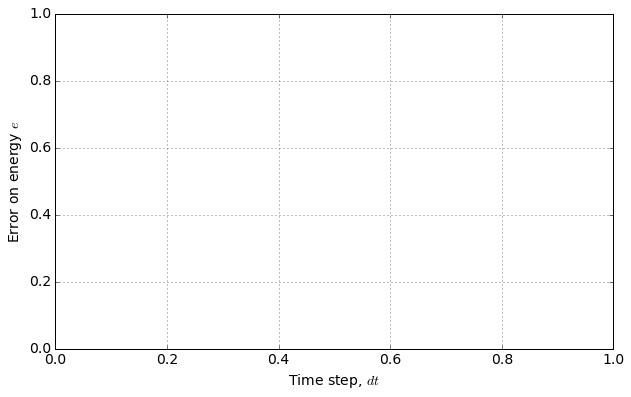

In [8]:
plt.xlabel("Time step, $dt$")
plt.ylabel("Error on energy $e$")
plt.grid()
plt.show()

### Effect of the intégrator

Plot the error indicator *vs*. the computing time for Euler, RK4 and ODEint integrators. Comment the efficiency of each integrator. 

### Dampened oscillator

#### Theory

**Note:** From now on, you will use only a reliable integrator configuration.

Create a new oscillator instance with various values of $\zeta$. Plot the position *vs.* time and comment. Is the result in good agreement with theory.

### Driven oscillator

Create a new oscillator instance using a driving acceleration:

In [9]:
fd = 4.
omegad = 2. * np.pi * fd
def ddotxd(t):
  """
  Driving acceleration
  """  
  return np.sin(omegad * t)

#### Steady state

Simulate the evolution of the position *vs.* time. Comment the existence of a steady state.

#### Steady state total energy

Plot the steady state total energy vs. omegad. Compare with theory.